In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

import os
import sys
sys.path.append('c:/Users/Saroj Chand/Documents/GitHub/nv-center-network-analysis')
from scripts.network_analysis import*

In [2]:
# Load correlation matrices
output_dir = '../data/correlation_matrix'
correlation_matrix_diff = np.load(os.path.join(output_dir, 'diff_corr_coeffs.npy'))
# correlation_matrix_signal = np.load(os.path.join(output_dir, 'correlation_matrix_signal.npy'))

Reference Counts Correlation Network:


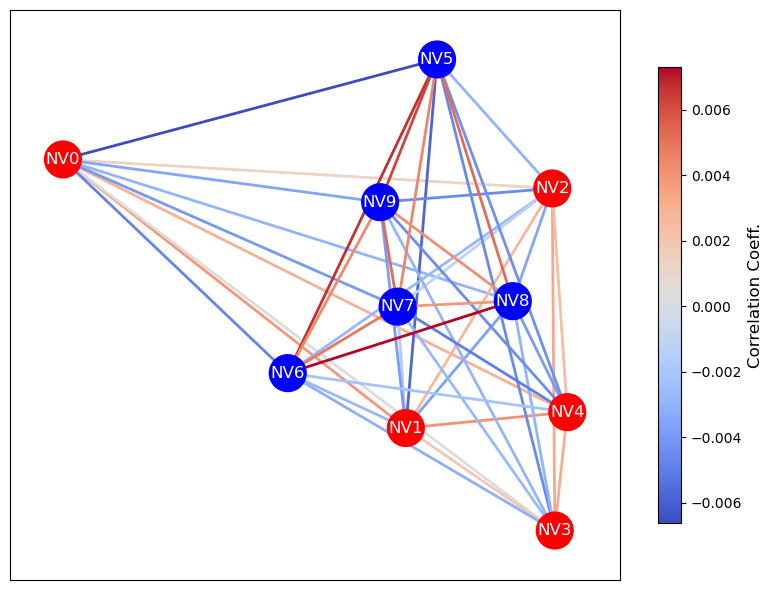

In [3]:
# Build and plot networks for both reference and signal correlation matrices
threshold = 0

# NV coordinates (pixels)
coords = [
    [58.628, 139.616],
    [137.025, 74.662],
    [170.501, 132.597],
    [171.074, 49.877],
    [173.93, 78.505],
    [144.169, 163.787],
    [110.023, 87.942],
    [135.139, 104.013],
    [161.477, 105.335],
    [131.144, 129.272]
]

G_diff = build_network(correlation_matrix_diff, threshold)
print("Reference Counts Correlation Network:")
plot_network_coords(G_diff,coords)

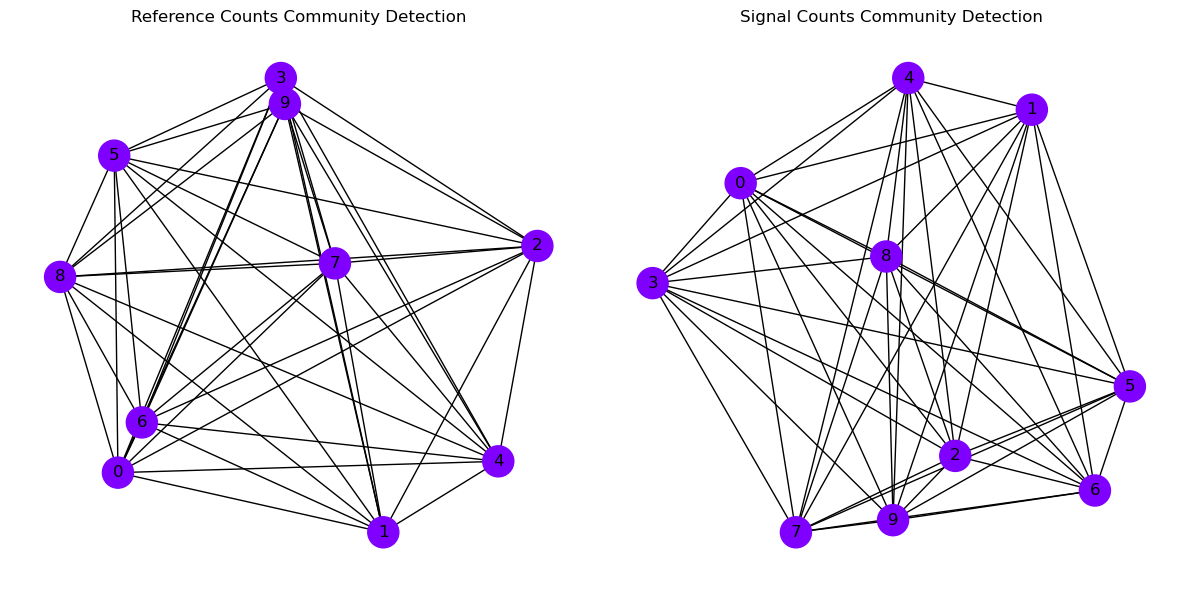

In [11]:
# plot_degree_distribution(G_diff,G_diff)
# plot_clustering_coefficient(G_diff,G_diff)
# plot_shortest_path_length(G_diff,G_diff)
plot_community_detection(G_diff,G_diff)
# plot_network_with_communities(G_diff, decimal_places=3)
# plot_centrality_measures(G_diff,G_diff)

## Network Analysis

After constructing a graph network based on correlation matrices, we have the opportunity to investigate the structure and characteristics of the network. Here's a breakdown of potential analyses we can conduct in a Jupyter Notebook:

### 1. Basic Network Properties
- **Degree Distribution**: Investigate how node degrees are distributed throughout the network to understand its overall connectivity.
- **Clustering Coefficient**: Examine the tendency of nodes to form clusters or triangles, providing insights into the network's local structure.
- **Shortest Path Length**: Calculate the average shortest path length to gauge the efficiency of information flow within the network.

### 2. Community Detection
- **Modularity and Communities**: Employ algorithms such as the Louvain method or Girvan-Newman to identify distinct communities within the network, revealing clusters of highly interconnected nodes.
- **Community Structure**: Analyze the characteristics of individual communities, including their size, density, and connections to other communities.

### 3. Centrality Measures
- **Degree Centrality**: Identify nodes with the highest number of connections.
- **Betweenness Centrality**: Pinpoint nodes that serve as crucial bridges between different parts of the network.
- **Closeness Centrality**: Determine nodes that can efficiently interact with other nodes.
- **Eigenvector Centrality**: Highlight nodes that are connected to other highly connected nodes.

### 4. Network Robustness and Resilience
- **Attack and Failure Analysis**: Assess how the network's connectivity and structure are affected by removing nodes or edges.
- **Percolation Theory**: Study the network's behavior under random failures or targeted attacks.

### 5. Temporal Analysis
- If the data includes timestamps, explore how the network evolves over time, including changes in node properties, community structure, and centrality measures.

### 6. Visualization
- **3D Visualization**: Utilize 3D visualization tools to visualize complex network structures more effectively.
- **Interactive Visualization**: Employ tools like Gephi or interactive plots in Jupyter Notebooks for dynamic exploration of the network.

By conducting these analyses, we can gain deeper understanding the underlying structure, properties, and dynamics of the network.
